In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
plt.style.use("ggplot")
%matplotlib inline

In [2]:
path = "Output/"
frames = np.load(path + "IR_temp.npy")

In [3]:
fr_t = frames.reshape(frames.shape[0], frames.shape[1]*frames.shape[2])

In [4]:
fr_t = fr_t.T

In [6]:
fr_t.shape

(696960, 708)

In [21]:
temp_pca = PCA()

In [22]:
temp_pca.fit(fr_t)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [25]:
temp_pca.components_.shape

(708, 708)

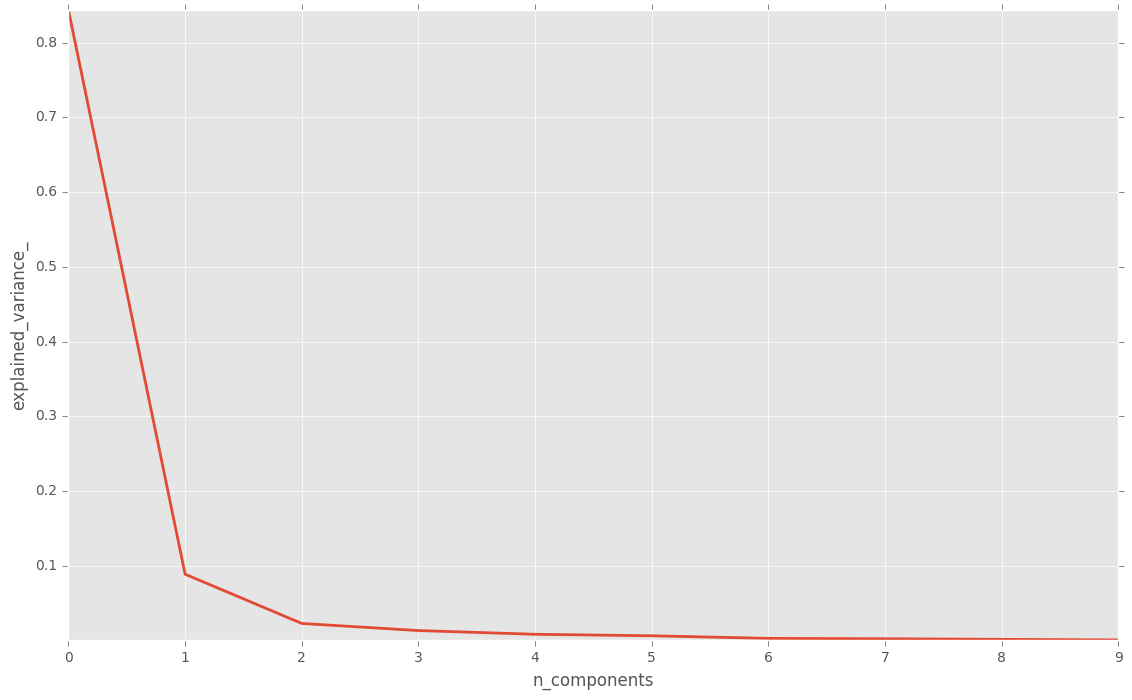

In [23]:
plt.figure(1, figsize=(15, 9))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.plot(temp_pca.explained_variance_ratio_[:10], linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')

In [41]:
mu = np.mean(fr_t, axis=0)

In [56]:
X_tran = temp_pca.transform(fr_t)

In [54]:
temp_no_sun = np.dot(X_tran[:,3:], temp_pca.components_[3:,])

In [55]:
temp_no_sun += mu

In [ ]:
np.sum(temp_no_sun-fr_t, axis=1)